In [1]:
# note run the data generator first.. this is only to handle the outputs of it.. 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 15, 10

In [2]:
curves = pd.read_pickle("outputs/all_metrics.pickle")

In [3]:
def display(curves, model):
    #sample sizes
    curves = curves.sort_values(by=["samples"])
    idx = curves["model.ident"] == model
    
    if np.sum(idx) == 0:
        print "nothing matching"
        return 
    
    if True:
        train =  np.array(curves[idx]["train.support"].tolist())
        valid =  np.array(curves[idx]["valid.support"].tolist())
        
        plt.plot(curves[idx]["samples"], train[:,0], "o", label="train - false")
        plt.plot(curves[idx]["samples"], valid[:,0], "o", label="valid - false")
        plt.plot(curves[idx]["samples"], train[:,1], "o", label="train - true")
        plt.plot(curves[idx]["samples"], valid[:,1], "o", label="valid - true")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - sample sizes")
        plt.grid(True)
        plt.show()

    
    if True:
        train =  np.array(curves[idx]["train.support"].tolist())
        valid =  np.array(curves[idx]["valid.support"].tolist())
        totals_train = np.sum(train, axis=1)
        totals_valid = np.sum(valid, axis=1)
                
        plt.plot(curves[idx]["samples"], train[:,0].astype(np.float)/totals_train, "o", label="ratio train - false")
        plt.plot(curves[idx]["samples"], valid[:,0].astype(np.float)/totals_valid, "o", label="ratio valid - false")
        plt.plot(curves[idx]["samples"], train[:,1].astype(np.float)/totals_train, "o", label="ratio train - true")
        plt.plot(curves[idx]["samples"], valid[:,1].astype(np.float)/totals_valid, "o", label="ratio valid - true")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - sample sizes")
        plt.grid(True)
        plt.show()    
        
    measures = ["acc", "loss", "mse"]
    for m in measures:
        plt.plot(curves[idx]["samples"], curves[idx]["train." + m], "o", color="red",  label="train")
        plt.plot(curves[idx]["samples"], curves[idx]["valid." + m], "o", color="blue", label="valid")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m)
        plt.grid(True)
        plt.show()
    
    measures = ["recall", "prec", "fscore"]
    for m in measures:
        train =  np.array(curves[idx]["train." + m].tolist())
        valid =  np.array(curves[idx]["valid." + m].tolist())
        
        plt.plot(curves[idx]["samples"], train[:,0], "o", color="red",  label="train - false")
        plt.plot(curves[idx]["samples"], valid[:,0], "o", color="blue", label="valid - false")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m + " - false")
        plt.grid(True)

        axes = plt.gca()
        axes.set_ylim([-0.05,1.05])
        plt.show()
        
        plt.plot(curves[idx]["samples"], train[:,1], "o", color="red",  label="train - true ")
        plt.plot(curves[idx]["samples"], valid[:,1], "o", color="blue", label="valid - true ")

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m + " - true")
        plt.grid(True)

        axes = plt.gca()
        axes.set_ylim([-0.05,1.05])
        plt.show()

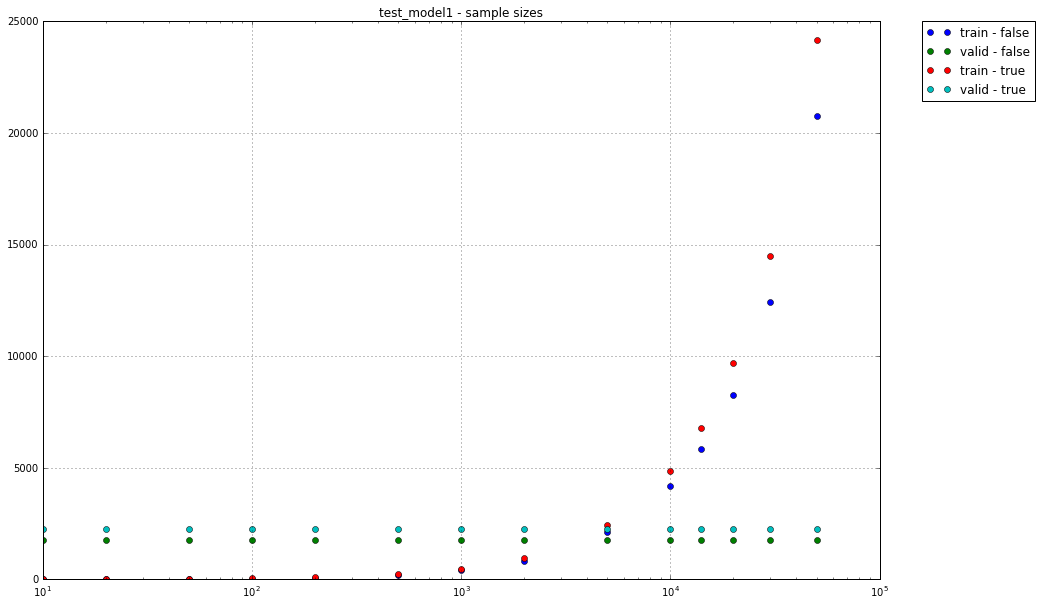

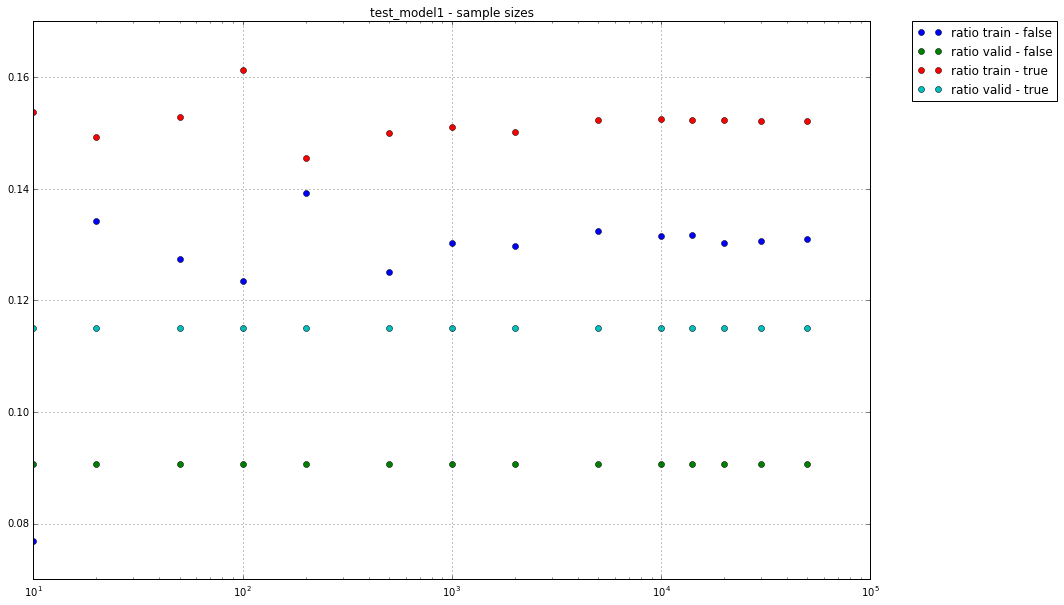

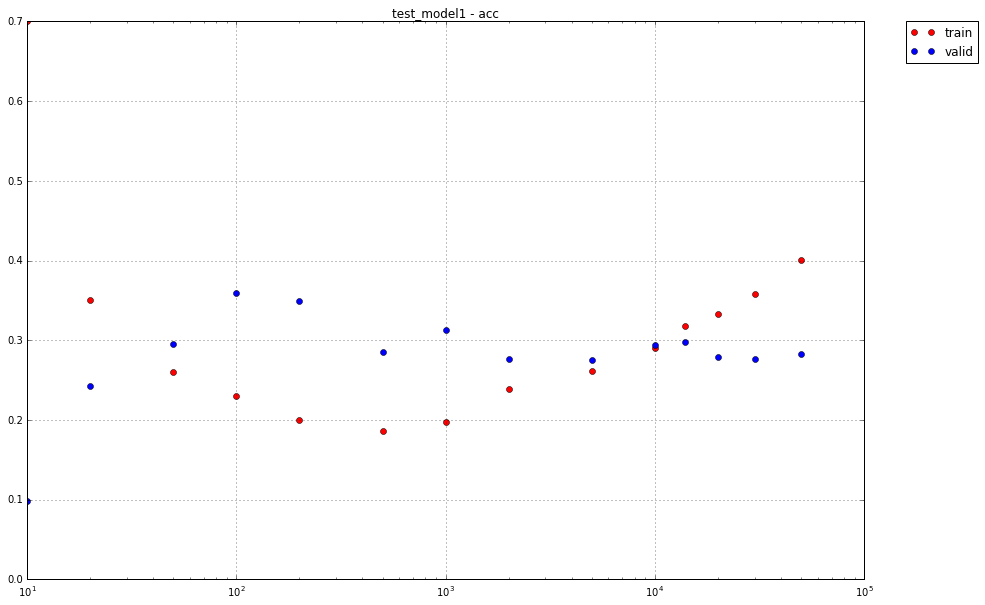

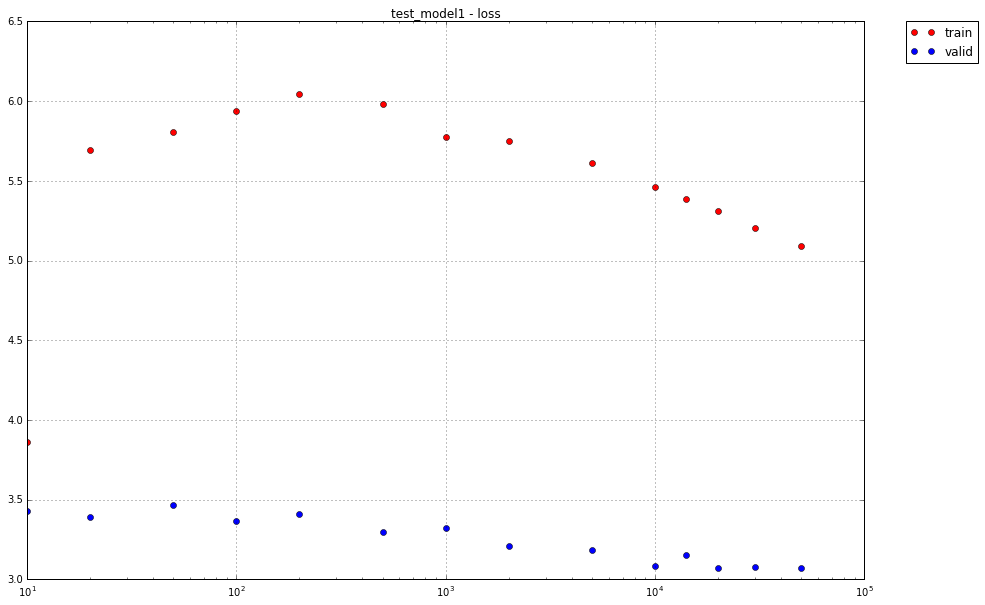

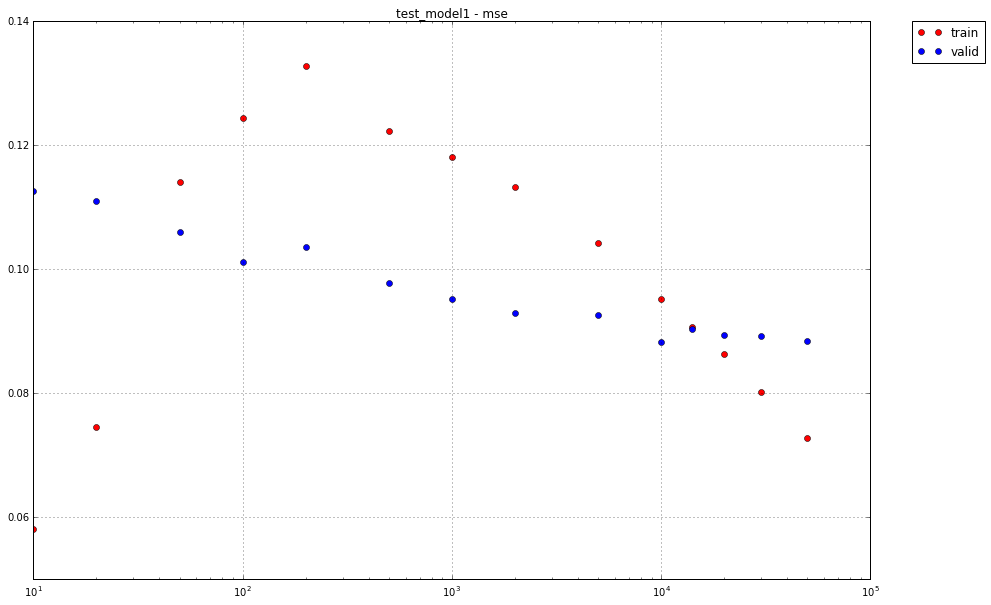

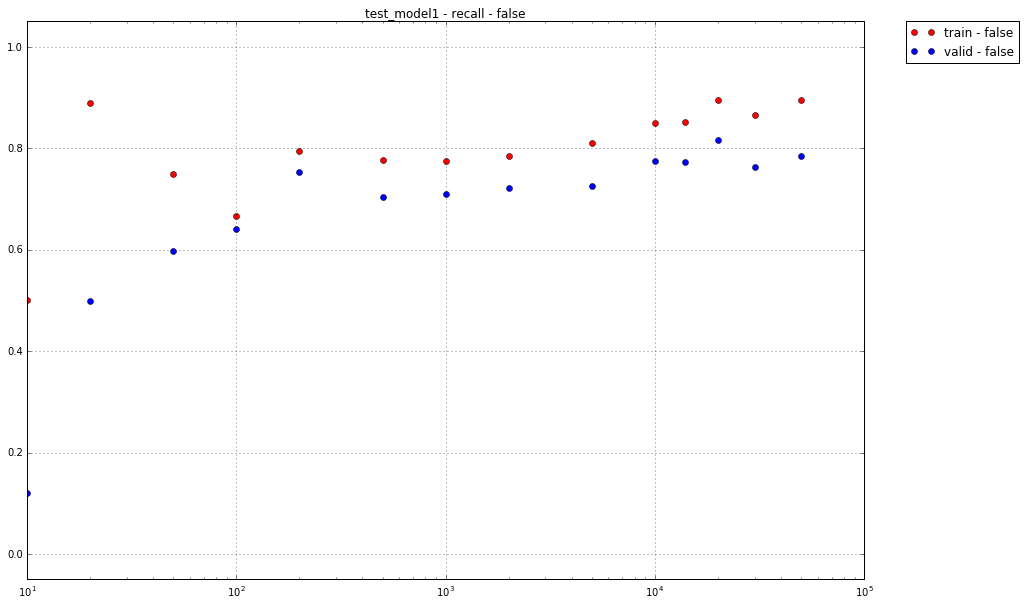

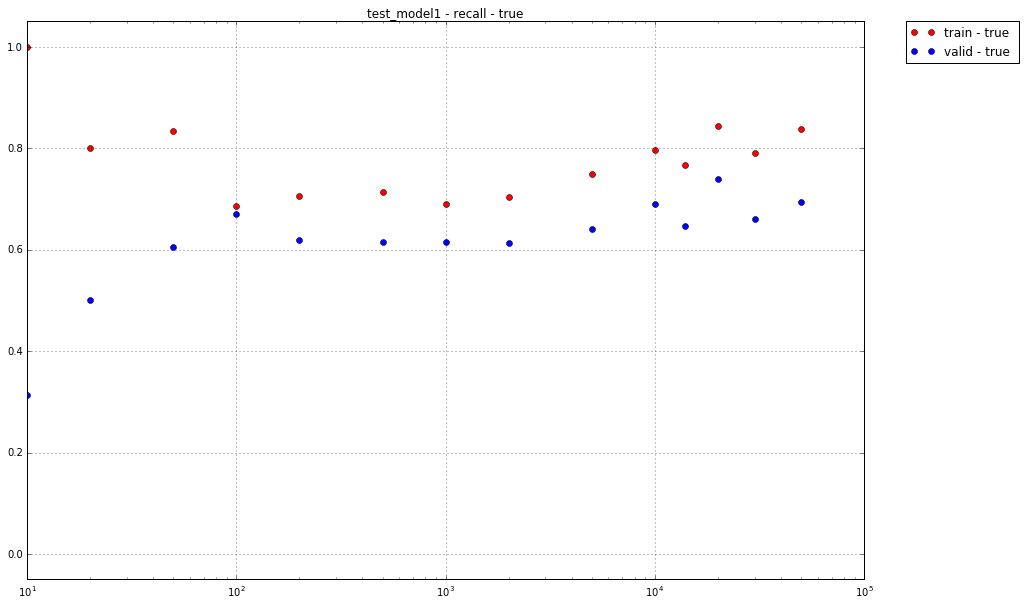

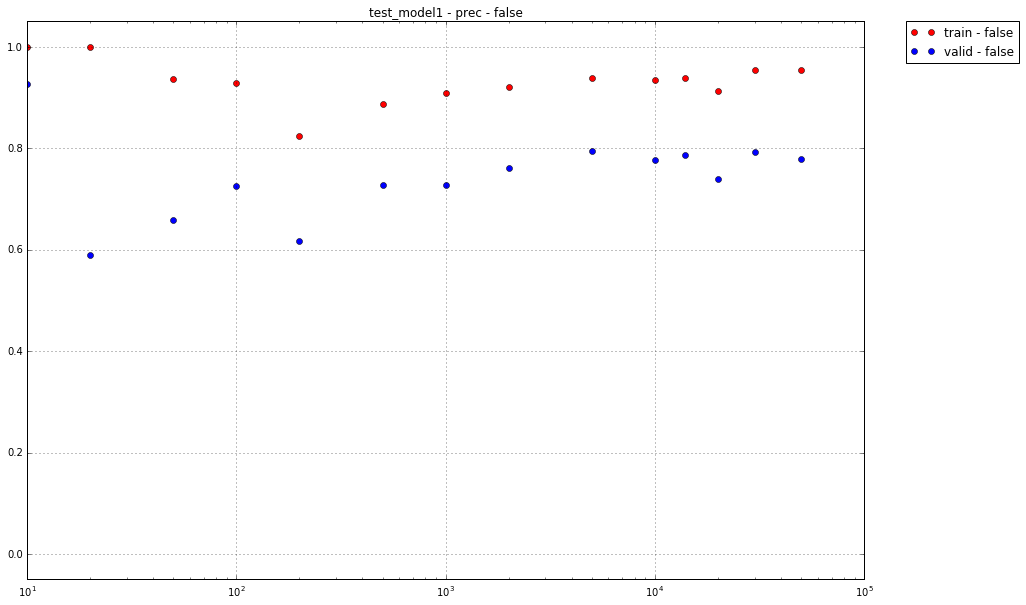

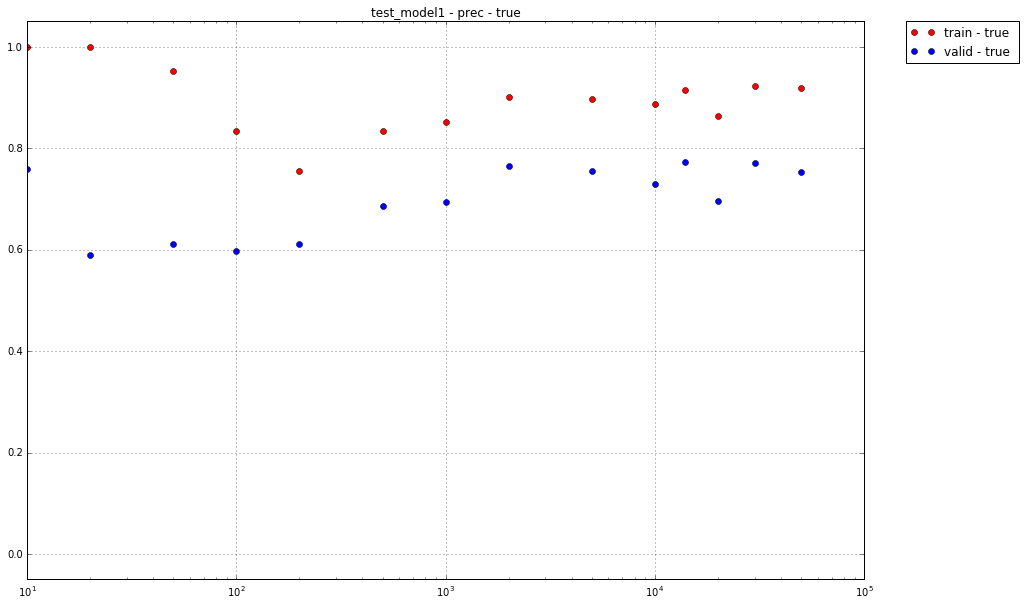

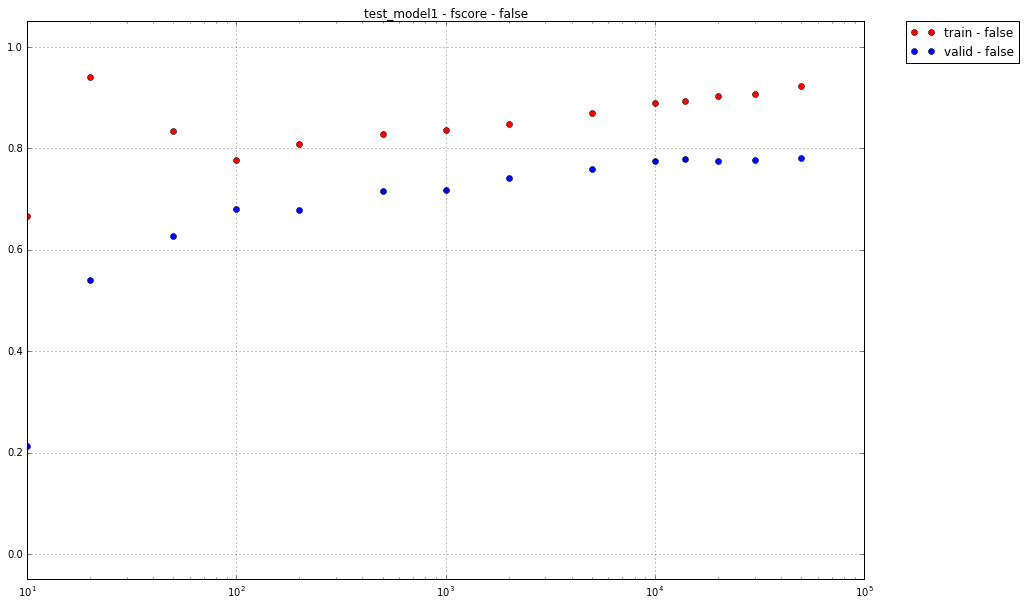

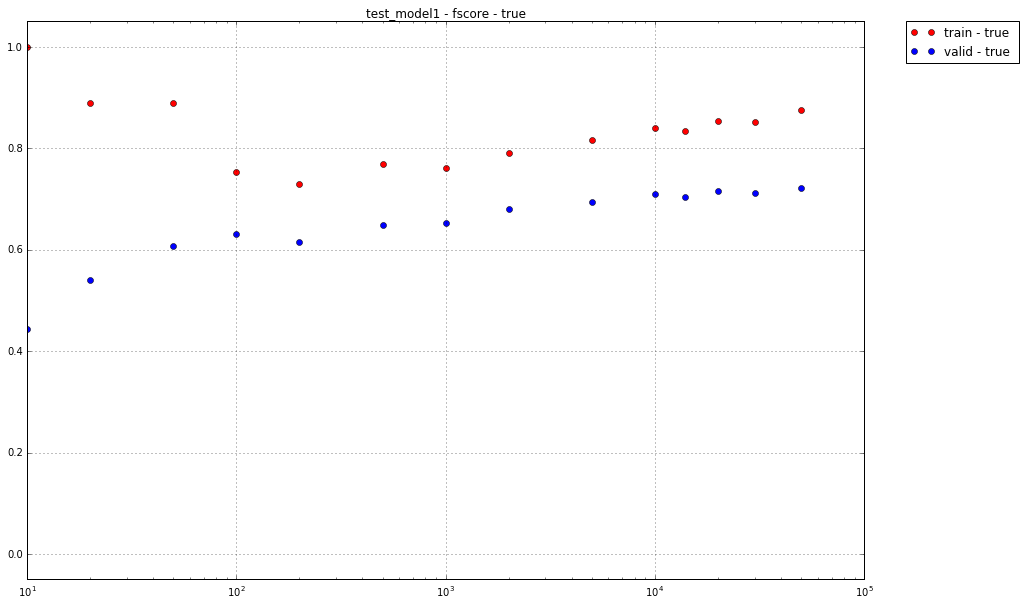

In [4]:
display(curves,"test_model1")

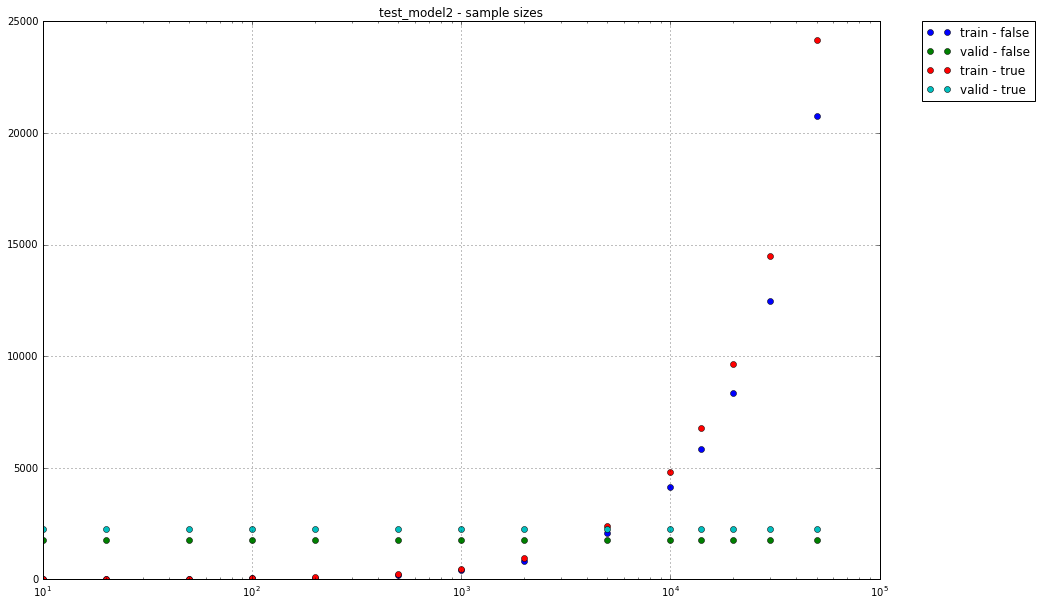

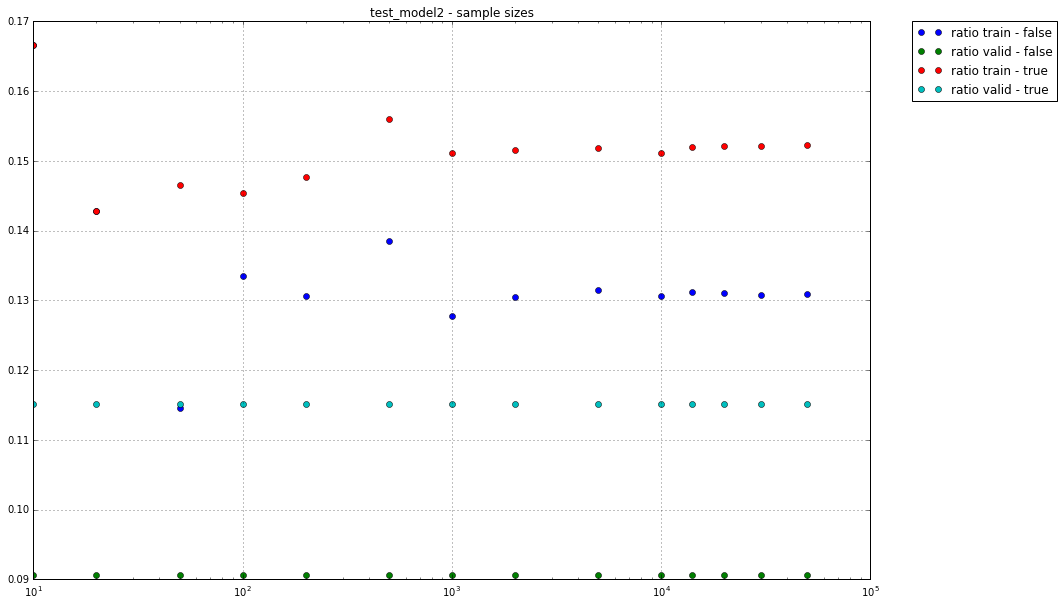

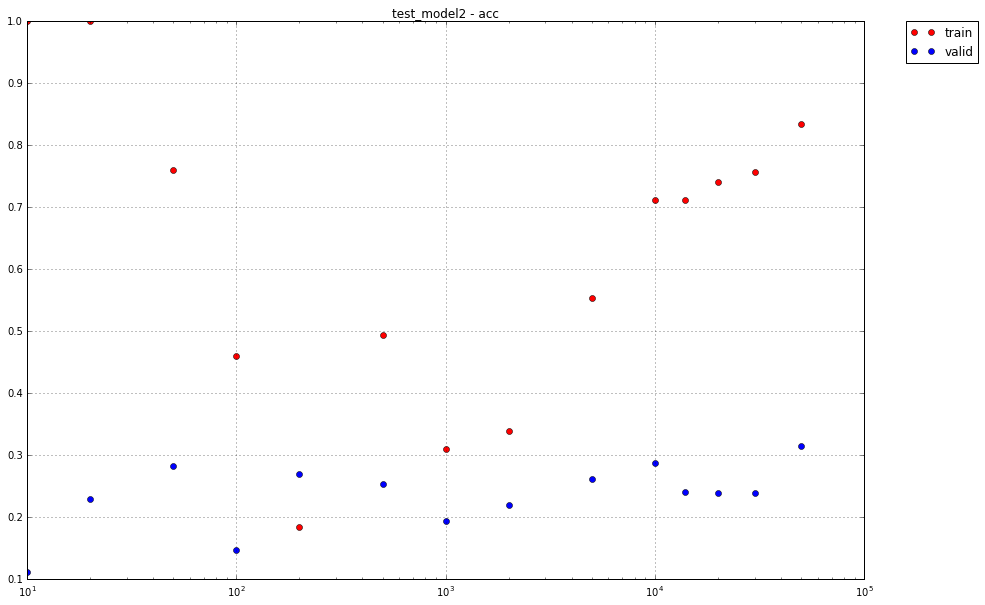

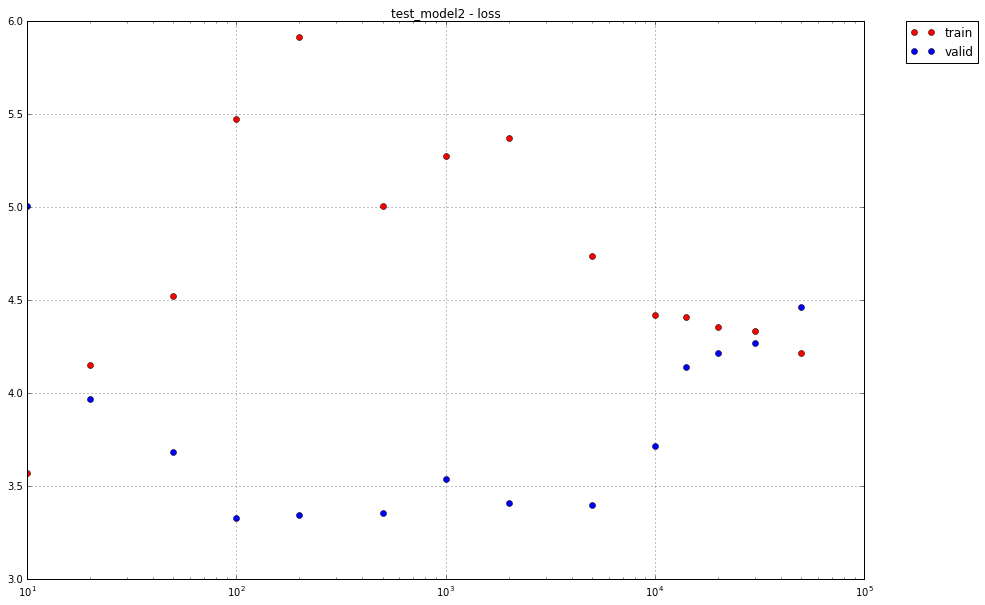

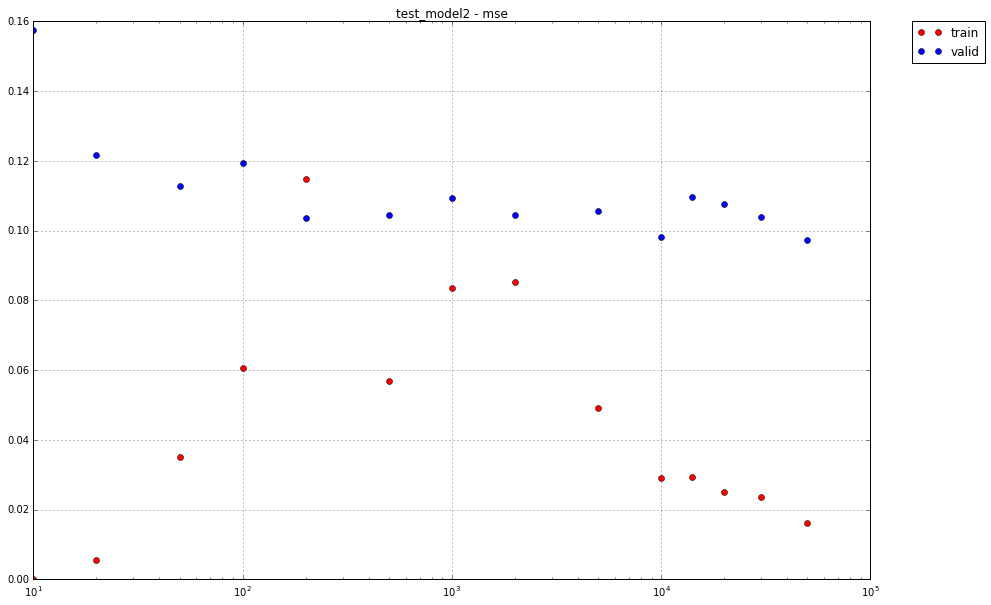

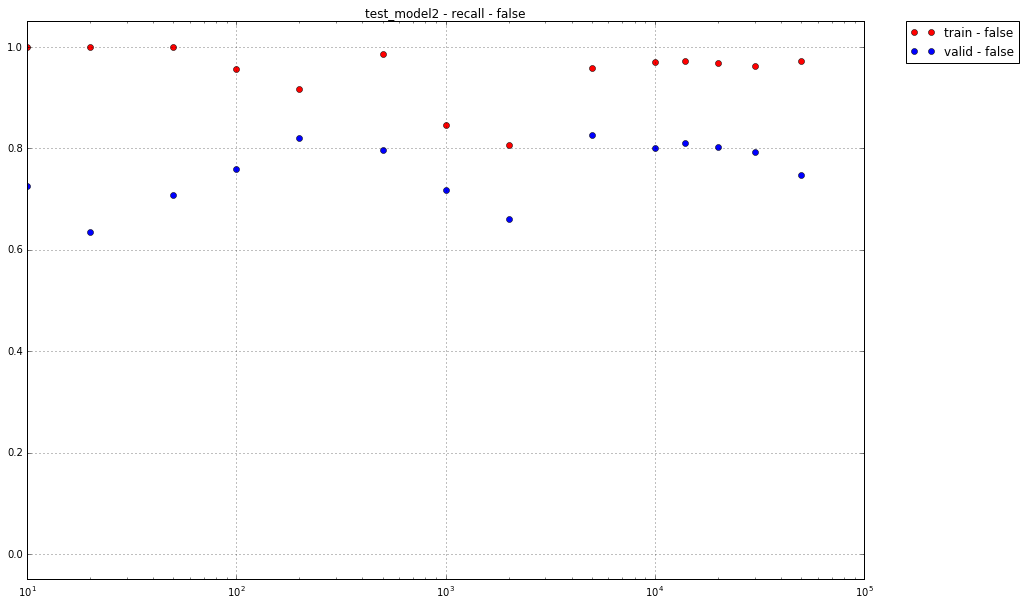

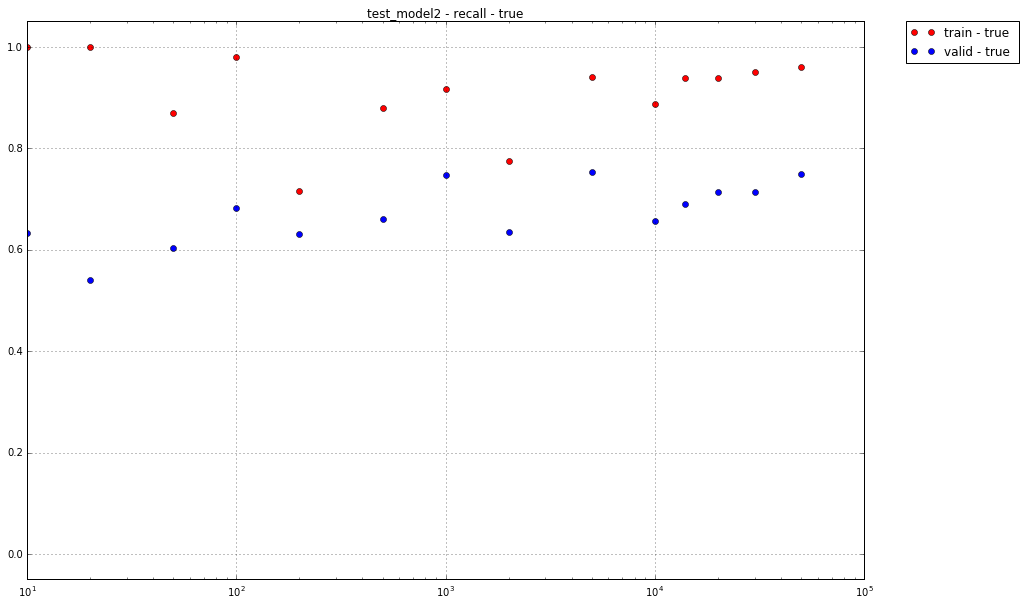

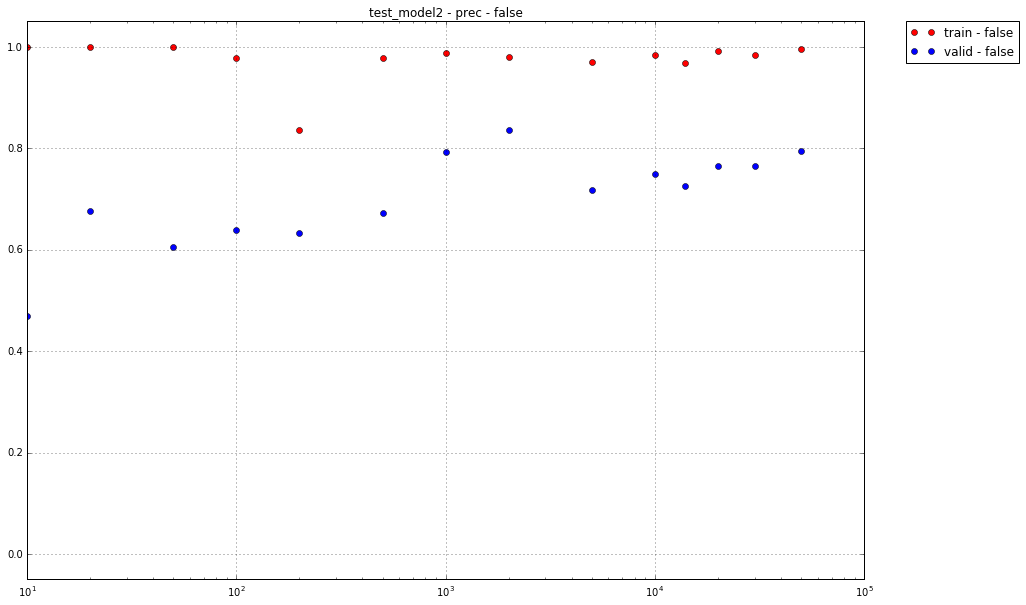

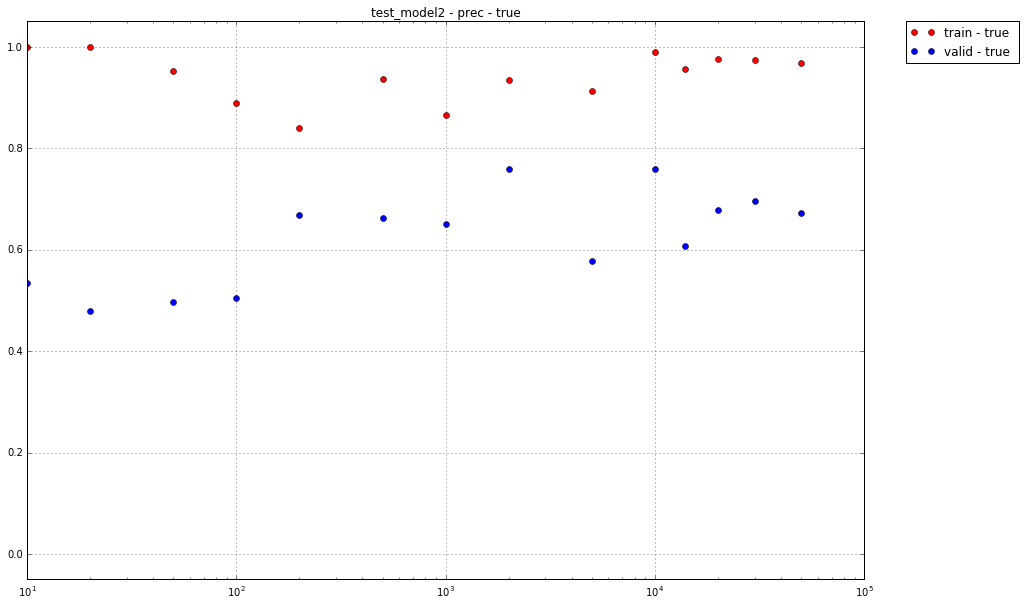

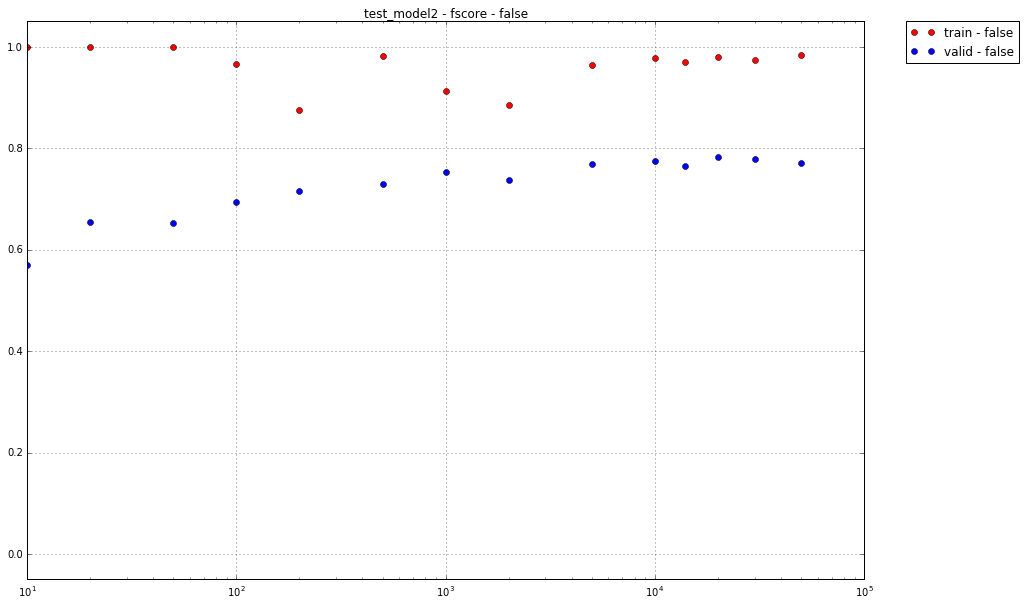

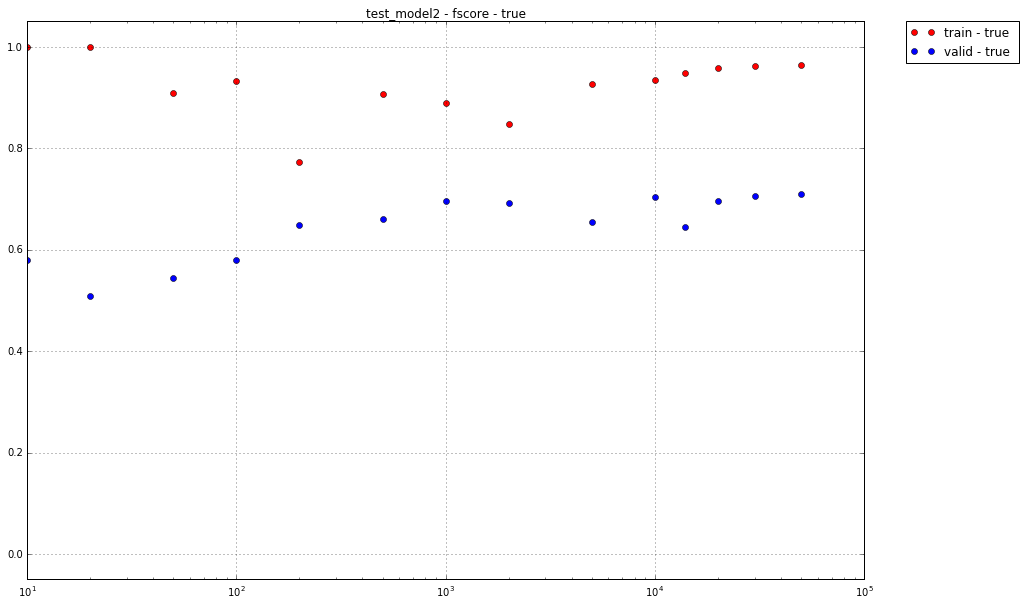

In [5]:
display(curves,"test_model2")

In [6]:
# this is annoying as hell...
scurves = curves.sort_values(by="valid.acc", ascending=False)

# 1. a random guess/all te/all false model will output 0.5 for the training or 
#     the class balance ratio for the validation(because its not rebalanced)

idx = scurves["train.acc"] < 0.52
print np.sum(idx), "/", idx.shape[0], " (", (float(np.sum(idx))/idx.shape[0]),  ")"

idx1 = idx
# 2. logic says that its very unlikely for a training set to perform worse than the validation set

idx = scurves["train.acc"] < scurves["valid.acc"]
print np.sum(idx), "/", idx.shape[0], " (", (float(np.sum(idx))/idx.shape[0]),  ")"

idx2 = idx
idx = idx1 | idx2

print np.sum(idx), "/", idx.shape[0], " (", (float(np.sum(idx))/idx.shape[0]),  ")"

valid_idx = ~idx

18 / 28  ( 0.642857142857 )
9 / 28  ( 0.321428571429 )
18 / 28  ( 0.642857142857 )


In [7]:
# in short these results are *half* garabage.. 
# the head scratcher part is how the hell is it *half* not *all* ... the models work *sometimes* 

In [8]:
print ("#" * 100)
print "best"
print scurves[["tag","valid.acc","train.acc", "samples", "model.ident"]].to_string()

####################################################################################################
best
                                         tag  valid.acc  train.acc  samples  model.ident
26  20decc496cba56857c1fd05453551d084867dfde     0.3594   0.230000    100.0  test_model1
21  e6a8060842e35f976e9b5eb764fbad0e12693b03     0.3498   0.200000    200.0  test_model1
16  72b74ffcd7e7e25b042262d170f152efa09d188f     0.3159   0.834160  50000.0  test_model2
23  af851f92861f7db673c1dc8ac314cc8895d51b6e     0.3128   0.197000   1000.0  test_model1
5   c1e7eca403f3b106577fb34b21e2de6772179500     0.2978   0.317571  14000.0  test_model1
15  3218a44be22cb560d51bed506c72826f135155ac     0.2956   0.260000     50.0  test_model1
2   a937783d7dba9523a6bed3e95bc65c8e932b57f0     0.2936   0.290400  10000.0  test_model1
6   977cd2bc956d40cdbc62545a8e5fee65aca10d90     0.2883   0.712400  10000.0  test_model2
1   4a45362adc37a97f63ef83ec83b8e005aab3bd0c     0.2851   0.186000    500.0  test_model1
9   